In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt

In [2]:
db = pymysql.connect(host = 'codeborn-bi-db.cvv1o1yrngie.ap-northeast-2.rds.amazonaws.com',
                       port = 3306,
                       user = 'weezing',
                       password = '5yYX72QNiemc',
                       db = 'codeborn')
cursor = db.cursor()

In [3]:
df_courses = pd.read_sql_query('SELECT * FROM courses',db)
df_professors = pd.read_sql_query('SELECT * FROM professors',db)
df_problems = pd.read_sql_query('SELECT * FROM problems',db)
df_tags = pd.read_sql_query('SELECT * FROM tags',db)
df_problem_detail = pd.read_sql_query('SELECT * FROM problem_detail',db)
df_assignments = pd.read_sql_query('SELECT * FROM assignments',db)
df_submissions = pd.read_sql_query('SELECT * FROM submissions',db)
df_students = pd.read_sql_query('SELECT * FROM students',db)
df_submission_problem_detail = pd.read_sql_query('SELECT * FROM submission_problem_detail',db)
df_submission_detail = pd.read_sql_query('SELECT * FROM submission_detail',db)
df_student_course_relation = pd.read_sql_query('SELECT * FROM student_course_relation',db)

C:\Users\hwang\AppData\Local\Temp\ipykernel_15984\51494210.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_courses = pd.read_sql_query('SELECT * FROM courses',db)
C:\Users\hwang\AppData\Local\Temp\ipykernel_15984\51494210.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_professors = pd.read_sql_query('SELECT * FROM professors',db)
C:\Users\hwang\AppData\Local\Temp\ipykernel_15984\51494210.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_problems = pd.read_sql_query('SELECT * FROM problems',db)
C:\Users\hw

In [6]:
#assignments와 submissions를 합친 테이블 생성
column_list = ["course_id", "assignment_id", "student_id", "submission_id", "submit_date", "total_score", "started_date", "ended_date"]
df_merge1 = pd.merge(df_assignments, df_submissions, on=["assignment_id"], how="inner")

#조교 조건 적용
df_students = df_student_course_relation[df_student_course_relation["teaching_assistant"]==0]
df_merge2 = pd.merge(df_merge1, df_students, on=["student_id", "course_id"], how="inner")
df_merge2 = df_merge2[(df_merge2["assignment_id"]!= 1)&(df_merge2["student_id"]!= 11)].reset_index()

#날짜 조건 적용
df_merge2["result"] = (df_merge2["submit_date"] >= df_merge2["started_date"])&(df_merge2["submit_date"] <= df_merge2["ended_date"])
df_condition = df_merge2[df_merge2["result"]].reset_index()

#사용할 최종 데이터 프레임
df = df_condition[column_list]
df

,course_id,assignment_id,student_id,submission_id,submit_date,total_score,started_date,ended_date
0,DSAA-2021,3,22,43,2021-09-18 21:23:33,100.0,2021-09-01,2021-12-31 00:00:00
1,DSAA-2021,6,22,296,2021-09-23 12:13:46,NaN,2021-09-23,2021-09-24 00:00:00
2,DSAA-2021,6,22,297,2021-09-23 12:13:55,NaN,2021-09-23,2021-09-24 00:00:00
3,DSAA-2021,6,22,298,2021-09-23 12:15:50,NaN,2021-09-23,2021-09-24 00:00:00
4,DSAA-2021,6,22,299,2021-09-23 12:16:55,NaN,2021-09-23,2021-09-24 00:00:00
...,...,...,...,...,...,...,...,...
13949,DSAA-2022,40,212,21251,2022-10-25 23:53:33,NaN,2022-10-12,2022-10-25 23:59:59
13950,DSAA-2022,40,212,21253,2022-10-25 23:53:50,NaN,2022-10-12,2022-10-25 23:59:59
13951,DSAA-2022,40,212,21254,2022-10-25 23:54:09,NaN,2022-10-12,2022-10-25 23:59:59
13952,DSAA-2022,41,212,21362,2022-12-10 23:39:13,NaN,2022-12-06,2022-12-11 00:00:00


### 1. 각 코스별로 제출 학생의 숫자와 숙제 제출한 숙제를 출력하시오

In [7]:
students = df.groupby("course_id").agg({"student_id": "unique"})["student_id"].apply(lambda x: len(x))
submission = df.groupby("course_id").agg({"submission_id": "count"})
res1 = pd.concat([students],  axis=1)
res2 = pd.concat([submission],  axis=1)
res1, res2

(           student_id
 course_id            
 DSAA-2021          38
 DSAA-2022          31
 PY-2022S           94,
            submission_id
 course_id               
 DSAA-2021           2386
 DSAA-2022           1527
 PY-2022S           10041)

In [32]:
students = df.groupby("course_id").agg({"student_id": "unique"})["student_id"].apply(lambda x: len(x))
submission = df.groupby("course_id").agg({"submission_id": "count"})
res1 = pd.concat([students,submission],  axis=1)
res1

,student_id,submission_id
course_id,,
DSAA-2021,38,2386
DSAA-2022,31,1527
PY-2022S,94,10041


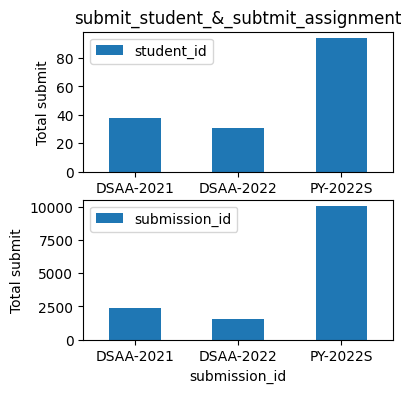

In [8]:
fig, ax=plt.subplots(2)
res1.plot(kind='bar', title='submit_student_&_subtmit_assignment', rot=0,
               ylabel='Total submit', xlabel='course_id', ax=ax[0], figsize=(4,4))
res2.plot(kind='bar', rot=0,
               ylabel='Total submit', xlabel='submission_id', ax=ax[1], figsize=(4,4))
plt.show()

### 2. 각 코스별, 숙제별로 숙제를 가장 빨리 제출한 학생의 아이디와 제출한 시간을 출력하시오

<AxesSubplot: xlabel='student_id', ylabel='submit_date'>

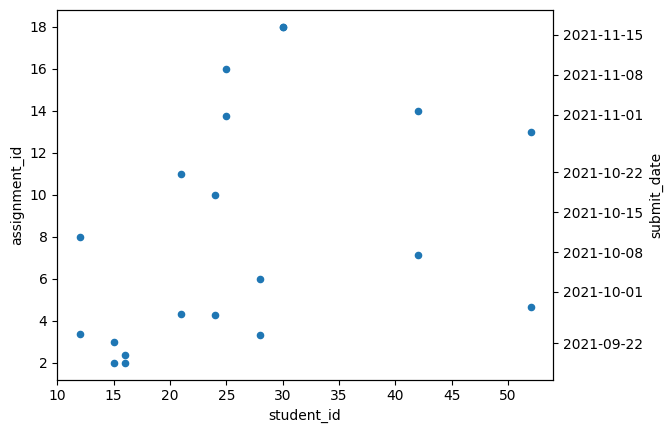

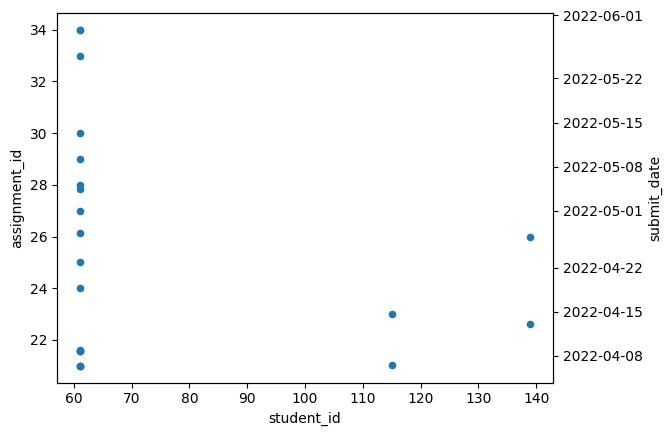

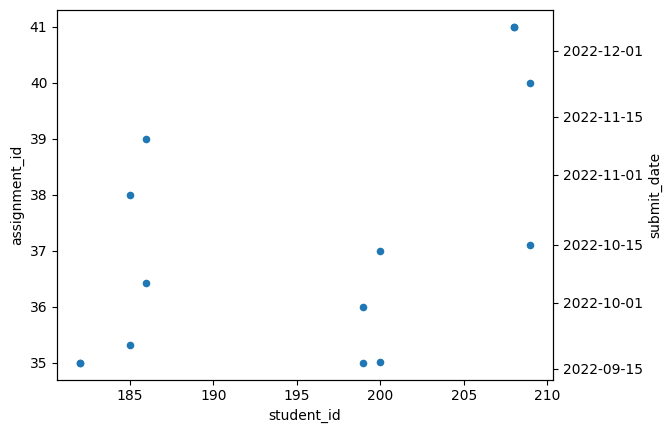

In [47]:
submit = df.groupby(["course_id", "assignment_id"]).agg({"submit_date": np.min})
result2 = pd.merge(df, submit, on = "submit_date")[["course_id", "assignment_id", "student_id", "submit_date"]]

re3 = result2.loc[0:9,:]
re4 = result2.loc[10:20,:]
re5 = result2.loc[21:27,:]

fig, ax0 = plt.subplots()

ax1 = ax0.twinx()

re3.plot.scatter(x='student_id',y='assignment_id',stacked=True, ax=ax0) #stacked=True는 기본값
re3.plot.scatter(x='student_id',y='submit_date',stacked=True, ax=ax1)

fig, ax2 = plt.subplots()

ax3 = ax2.twinx()

re4.plot.scatter(x='student_id',y='assignment_id',stacked=True, ax=ax2) #stacked=True는 기본값
re4.plot.scatter(x='student_id',y='submit_date',stacked=True, ax=ax3)

fig, ax4 = plt.subplots()

ax5 = ax4.twinx()

re5.plot.scatter(x='student_id',y='assignment_id',stacked=True, ax=ax4) #stacked=True는 기본값
re5.plot.scatter(x='student_id',y='submit_date',stacked=True, ax=ax5)
#plt.show()

### 3. 각 코스별, 숙제별로 학생들이 숙제를 제출한 회수를 출력하시오

In [71]:
result3 = df.pivot_table(["submission_id"],
            index=[df.course_id, df.assignment_id],
            aggfunc="count")
result3.reset_index(drop=False)

,course_id,assignment_id,submission_id
0,DSAA-2021,2,155
1,DSAA-2021,3,40
2,DSAA-2021,6,180
3,DSAA-2021,8,109
4,DSAA-2021,10,14
5,DSAA-2021,11,26
6,DSAA-2021,13,728
7,DSAA-2021,14,790
8,DSAA-2021,16,228
9,DSAA-2021,18,116


<AxesSubplot: ylabel='course_id,assignment_id'>

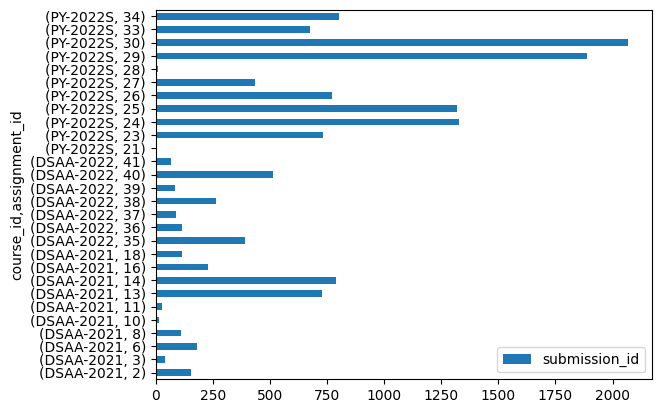

In [78]:
result3.plot(kind= 'barh')
#3개 쪼개기 하기

### 4. 각 코스별, 숙제별, 학생별로 처음 만점이 될 때까지의 제출 횟수를 출력하시오
### (단 만점이 아닌 경우에는 출력하지 않습니다.)

In [87]:
df4 = df.copy()
df4["perfect"] = (df4["total_score"] == 100)
first_perfect = df4[df4["perfect"]].pivot_table(["submit_date"],
                index=[df.course_id, df.assignment_id, df.student_id],
                aggfunc=np.min)
df4_merge = pd.merge(df4, first_perfect, on=["course_id", "assignment_id", "student_id"], how="left")
before_perfect = df4_merge[df4_merge["submit_date_x"]<=df4_merge["submit_date_y"]]
result4 = before_perfect.pivot_table(["submission_id"],
            index=[df.course_id, df.assignment_id, df.student_id],
            aggfunc="count")

result4 

submission_id
course_id assignment_id student_id               
DSAA-2021 2             12                      2
                        13                      1
                        15                     13
                        16                      4
                        18                      7
...                                           ...
PY-2022S  34            138                    26
                        141                    50
                        148                    26
                        152                    12
                        162                     8

[525 rows x 1 columns]

### 8. 각 코스별, 각 숙제별로 학생들이 처음 제출한 시간과 마지막으로 제출한 시간을 출력하시오   

In [130]:
result8 = df.groupby(["course_id", "assignment_id"]).agg({"submit_date":[min, max]}).reset_index(drop=False)
result8

r111 = result8.loc[0:9,:]
r112 = result8.loc[10:16,:]
r113 = result8.loc[17:27,:]

r112

course_id assignment_id         submit_date                    
                                            min                 max
10  DSAA-2022            35 2022-09-16 10:40:06 2022-09-17 19:59:15
11  DSAA-2022            36 2022-09-16 10:14:55 2022-09-17 02:40:58
12  DSAA-2022            37 2022-09-16 13:04:01 2022-09-17 23:35:14
13  DSAA-2022            38 2022-09-20 16:57:08 2022-09-22 23:56:29
14  DSAA-2022            39 2022-10-05 15:19:33 2022-10-05 23:43:59
15  DSAA-2022            40 2022-10-14 21:33:06 2022-10-25 23:57:49
16  DSAA-2022            41 2022-12-06 19:31:49 2022-12-10 23:46:36

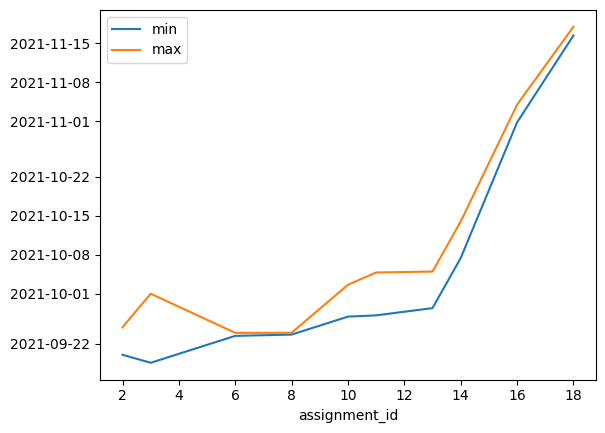

In [162]:
r = r111.plot(x = 'assignment_id', y = 'submit_date')
#r.fill_between(r111['assignment_id'],r111[min],r111[max],interpolate=True,color = 'red', alpha = 0.25)
# 음영처리